# 第十章 时间序列数据的基本回归

## 0. 概览
时间序列数据区别于横截面数据的一个明显特点：时间序列数据集是按照时间顺序排列的；本文档具体安排如下：
1. 静态时间序列模型（static time series models)
2. 利用R处理时间序列数据的技术性细节（technical details in R）
3. 其他时间序列模型（other models）
    - 动态（dynamic）
    - 趋势（trend）
    - 季节（seasonal）

In [27]:
#本文档使用wooldridge，2013，Introductory Econometrics: A modern Approach中的数据
library(wooldridge)

## 1. 静态时间序列模型

### 以通货膨胀和赤字对利率的影响为例
**思路：**
时间序列静态模型等同于横截面数据的分析，因此，使用横截面中的总体多元回归模型:
$$i3_{t}=\beta_{0}+\beta_{1}inf_{t}+\beta_{2}def_{t}+u$$
对应的样本多元回归方程：
$$\widehat{i3_{t}}=\widehat{\beta_{0}}+\widehat{\beta_{1}}inf_{t}+\widehat{\beta_{2}}def_{t}$$


In [28]:
#使用wooldridge包中intdef数据集
StaticModel<-lm(i3~inf+def,data=intdef)
summary(StaticModel)


Call:
lm(formula = i3 ~ inf + def, data = intdef)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9948 -1.1694  0.1959  0.9602  4.7224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.73327    0.43197   4.012  0.00019 ***
inf          0.60587    0.08213   7.376 1.12e-09 ***
def          0.51306    0.11838   4.334 6.57e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.843 on 53 degrees of freedom
Multiple R-squared:  0.6021,	Adjusted R-squared:  0.5871 
F-statistic: 40.09 on 2 and 53 DF,  p-value: 2.483e-11


**解释**：
1. 整体模型拟合程度：$R^{2}$=0.6021,调整$R^{2}$=0.5871,该模型可以解释i3变量60%的波动；
2. 单个系数统计显著性：$\widehat{\beta_{1}}$,$\widehat{\beta_{2}}$在显著性水平为0.01水平下显著
3. 单个系数经济显著性：def,inf>0知，赤字和通货膨胀对利率的影响为正向效应，它们的影响与经济学原理一致；$\widehat{\beta_{1}}=0.60587$其他条件不变的情况下，通货膨胀上升1%，i3提高0.60587点,$\widehat{\beta_{2}}=0.51306$其他条件不变的情况下，赤字上升1%，i3提高0.51306点

# 2. 时间序列数据类型（in R）

时间序列常常涉及到各种计算，如滞后项（lags）、趋势项（trend）和季节效应（seasonal effects），因此我们必须显示定义它的数据结构（data structure）。按照时间的间隔程度，时间序列分为两类：
- 规范的（regular）：在某一固定时间间隔上收集的时间序列数据
- 非规范的（irregular）：不在同一时间间隔上收集的时间序列数据


Time Series:
Start = 1948 
End = 2003 
Frequency = 1 
 [1]  1.04  1.10  1.22  1.55  1.77  1.93  0.95  1.75  2.66  3.27  1.84  3.41
[13]  2.93  2.38  2.78  3.16  3.55  3.95  4.88  4.32  5.34  6.68  6.46  4.35
[25]  4.07  7.04  7.89  5.84  4.99  5.27  7.22 10.04 11.51 14.03 10.69  8.63
[37]  9.58  7.48  5.98  5.82  6.69  8.12  7.51  5.42  3.45  3.02  4.29  5.51
[49]  5.02  5.07  4.81  4.66  5.85  3.45  1.62  1.02

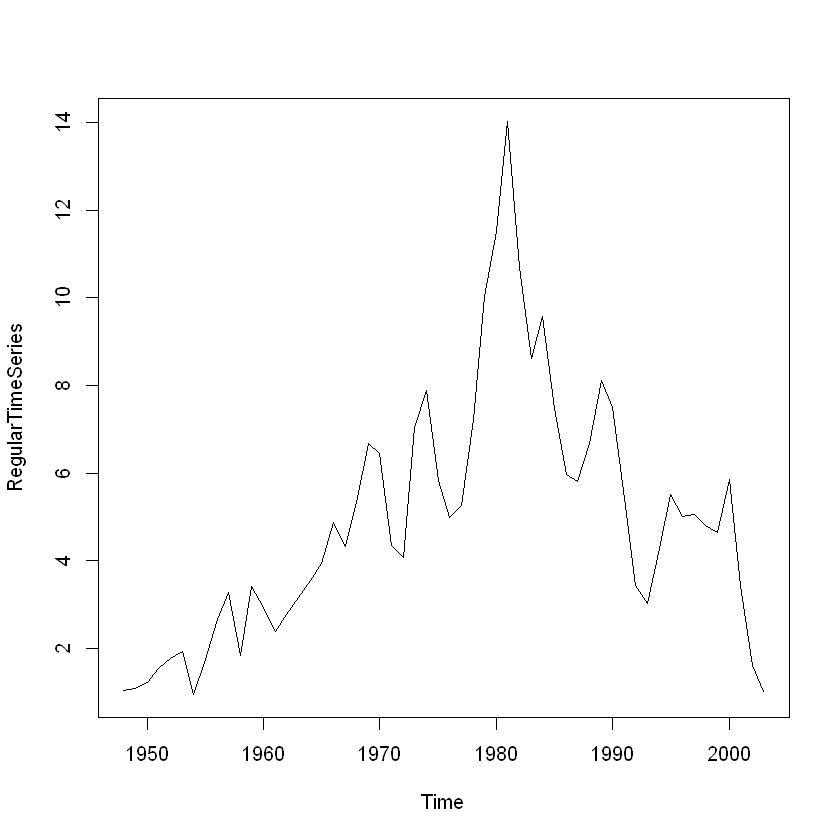

In [29]:
#ts函数用于定义规范的时间序列intdef中的i3
RegularTimeSeries<-ts(intdef$i3,start=1948,end=2003,frequency=1)
RegularTimeSeries#查看该序列原始数据
plot(RegularTimeSeries)#看出时间序列折线图查看该序列基本特征，如平稳性

**解释：**
时间序列折线图可以查看该序列的基本特征

In [ ]:
#zoo包中的zoo函数可同时用于规范和非规范时间序列的定义，原理是根据变量定义时间序列
library(zoo)
IrregularTimeSeries<-zoo(intdef$i3,order.by=intdef$year)
plot(IrregularTimeSeries)

**解释：**
zoo函数定义时间序列的方式是把数据集中的时间变量与序列值相联系，可用于规范和非规范序列

金融应用中，往往需要获取在线的金融时间序列数据，R中的pdfetch可以满足一定的要求

In [ ]:
#使用pdfetch_YAHOO函数获取Yahoo财经的数据
library(pdfetch)
tickernames=c("^gspc","^ixic","AAPL")
yahoo<-pdfetch_YAHOO(tickernames,fields="adjclose",from="2016-01-01",to="2018-01-01")

In [ ]:
plot(yahoo$AAPL)

In [ ]:
head(yahoo)
tail(yahoo)

# 3. 其他时间序列模型

lm包处理静态回归模型，dynlm包可处理动态回归，其中包括滞后算子，差分算子，趋势算子，季节算子


In [49]:
library(dynlm)


以个人税收豁免对生育率的影响为例

In [41]:
#有限分布滞后模型
Fertil3TS<-ts(fertil3,start=1913)

In [44]:
res1<-dynlm(gfr~pe+L(pe,1)+L(pe,2)+ww2+pill,data=Fertil3TS)
res2<-dynlm(gfr~pe+L(pe,1)+L(pe,2)+ww2+pill+trend(Fertil3TS),data=Fertil3TS)

In [37]:
library(stargazer)
library(lmtest)

In [51]:
stargazer(res1,res2,type="text")


                                 Dependent variable:             
                    ---------------------------------------------
                                         gfr                     
                             (1)                    (2)          
-----------------------------------------------------------------
pe                          0.073                  0.193*        
                           (0.126)                (0.105)        
                                                                 
L(pe, 1)                    -0.006                 -0.041        
                           (0.156)                (0.127)        
                                                                 
L(pe, 2)                    0.034                  0.128         
                           (0.126)                (0.105)        
                                                                 
ww2                       -22.126**              -26.445***      
         

In [52]:
coeftest(res1)


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  95.8704975   3.2819571 29.2114 < 2.2e-16 ***
pe            0.0726718   0.1255331  0.5789    0.5647    
L(pe, 1)     -0.0057796   0.1556629 -0.0371    0.9705    
L(pe, 2)      0.0338268   0.1262574  0.2679    0.7896    
ww2         -22.1264975  10.7319716 -2.0617    0.0433 *  
pill        -31.3049888   3.9815591 -7.8625 5.634e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [47]:
res3<-dynlm(d(gfr)~d(pe),data=Fertil3TS)

In [48]:
stargazer(res3,type="text")


                        Dependent variable:    
                    ---------------------------
                              d(gfr)           
-----------------------------------------------
d(pe)                         -0.043           
                              (0.028)          
                                               
Constant                      -0.785           
                              (0.502)          
                                               
-----------------------------------------------
Observations                    71             
R2                             0.032           
Adjusted R2                    0.018           
Residual Std. Error       4.221 (df = 69)      
F Statistic             2.263 (df = 1; 69)     
Note:               *p<0.1; **p<0.05; ***p<0.01
